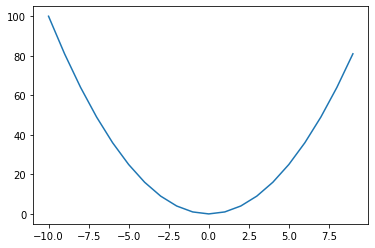

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
f_x = x ** 2

plt.plot(x, f_x)
plt.show()

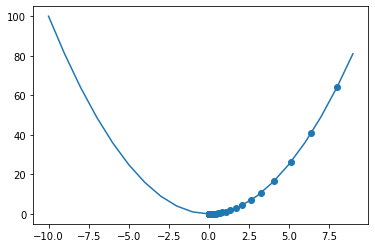

In [2]:
# 경사하강법
x_new = 10
derivative = []
y = []
learning_rate = 0.1
for i in range(100):
    old_value = x_new
    derivative.append(old_value - learning_rate * 2 * old_value)
    x_new = old_value - learning_rate * 2 * old_value
    y.append(x_new ** 2)
plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [3]:
# train이랑 test 분리
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5,2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [6]:
print(X_train)
print('---------')
print(X_test)
print('---------')
print(y_train)
print('---------')
print(y_test)

[[4 5]
 [0 1]
 [6 7]]
---------
[[2 3]
 [8 9]]
---------
[2, 0, 3]
---------
[1, 4]


In [7]:
#MAE
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

In [9]:
# RMSE(sklearn에선 RMSE는 직접 지원 X, 그냥 mse만 지원)
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [10]:
# 결정계수 R - squared (두 개의 값 증감이 얼마나 일관성 있는지) 
# 예측 직선위에 얼마나 정확성있게 실제값들이 있는지
from sklearn.metrics import r2_score
y_true = [3,-0.5, 2, 7] #관측치
y_pred = [2.5, 0.0, 2, 8] # 예측치
r2_score(y_true, y_pred)

0.9486081370449679

# 경사하강법을 선형회귀로 구현

In [11]:
import random
def gen_data(numPoints, bias, variance): # data 생성 함수
    x = np.zeros(shape = (numPoints, 2))
    y = np.zeros(shape = numPoints)
    
    for i in range(0,  numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (i + bias) + random.uniform(0,1) * variance
    return x, y
x, y = gen_data(100,25, 10)

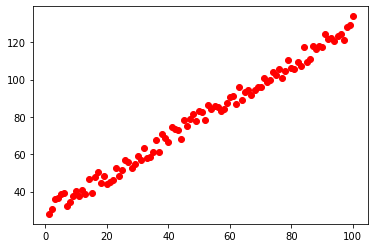

In [12]:
plt.plot(x[:,1] + 1, y, "ro")
plt.show()

In [15]:
# 경사하강법
def gradient_descent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    cost_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(xTrans, loss) /m 
        theta= theta - alpha * gradient
        if i % 250 == 0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta, np.array(theta_list), cost_list
m, n = np.shape(x)
numIterations = 5000
alpha = 0.0005
theta = np.ones(n)

theta,theta_list, cost_list = gradient_descent(x, y, theta, alpha, m, numIterations) 

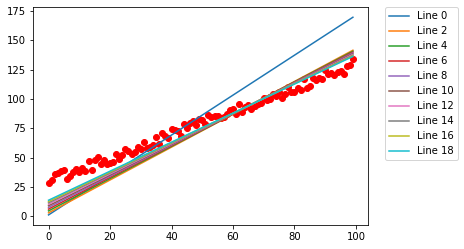

In [16]:
y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i],label='Line %d'%i)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,
borderaxespad=0.)
plt.show()


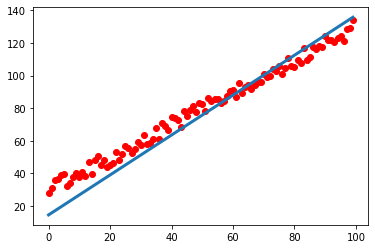

In [17]:
y_predict= np.dot(x, theta)
plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)
plt.show()

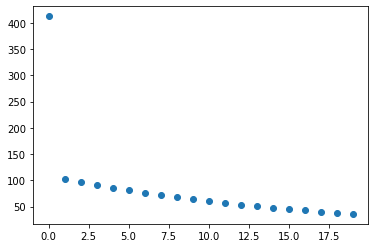

In [18]:
iterations = range(len(cost_list))
plt.scatter(iterations,cost_list)
plt.show()